In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("placement.csv")

In [5]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.shape

(100, 4)

In [8]:
#steps
#0.preprocess+EDA+Feature selection
#1. extract input and output cols
#2.scale the values
#3.train test split
#4.train the model
#5.evaluate the model/model selection
#6.deploy the model

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [10]:
df=df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'IQ of student')

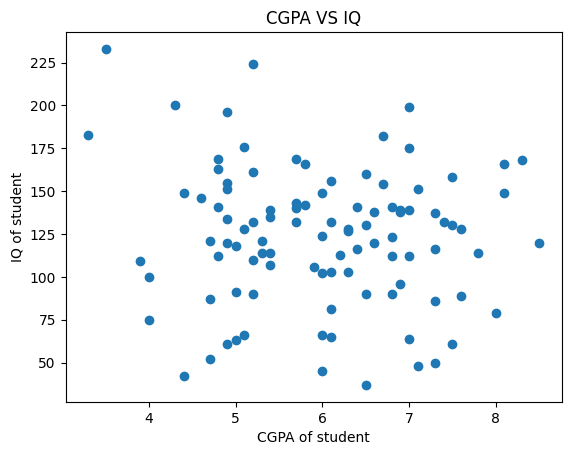

In [13]:
plt.scatter(df['cgpa'],df['iq'])
plt.title("CGPA VS IQ")
plt.xlabel("CGPA of student")
plt.ylabel("IQ of student")


# EDA

Text(0, 0.5, 'IQ of student')

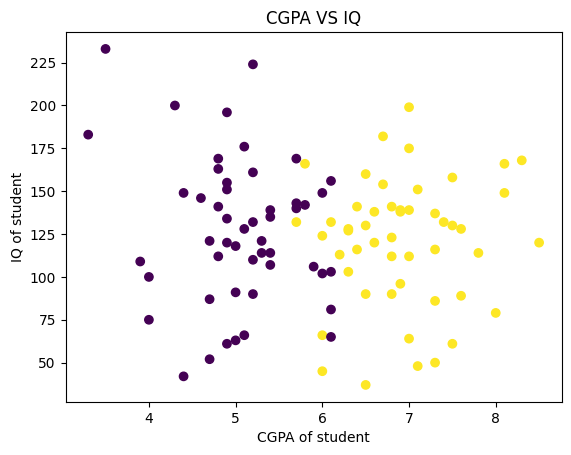

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.title("CGPA VS IQ")
plt.xlabel("CGPA of student")
plt.ylabel("IQ of student")

Text(0, 0.5, 'IQ of student')

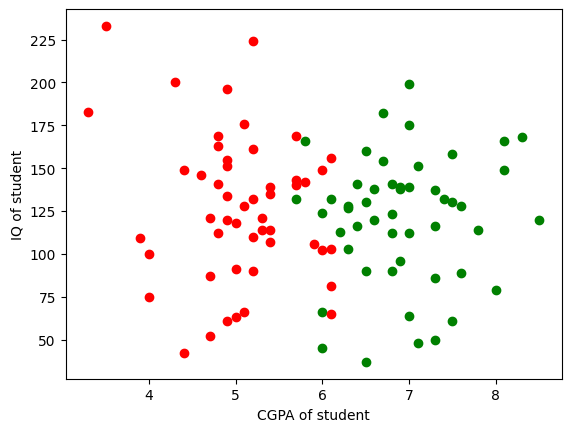

In [15]:
placed=df[df['placement']==1]
not_placed=df[df['placement']==0]
plt.scatter(placed['cgpa'],placed['iq'],color='green',label='placed')
plt.scatter(not_placed['cgpa'],not_placed['iq'],color='red',label='not placed')
plt.xlabel("CGPA of student")
plt.ylabel("IQ of student")

In [16]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]


In [17]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [18]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

# Train text split

In [19]:
!pip install scikit-learn

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
import sys
!{sys.executable} -m pip install scikit-learn


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_test_split(x,y,test_size=0.1)

[    cgpa     iq
 35   6.8   90.0
 12   5.4  139.0
 9    5.1   66.0
 94   4.7   52.0
 98   6.3  103.0
 ..   ...    ...
 61   7.3  137.0
 44   7.5   61.0
 63   6.3  128.0
 30   7.6  128.0
 76   4.9  155.0
 
 [90 rows x 2 columns],
     cgpa     iq
 90   7.3   86.0
 11   6.9  138.0
 2    5.3  121.0
 53   8.3  168.0
 17   3.3  183.0
 36   5.7  140.0
 27   6.0  124.0
 99   6.2  113.0
 64   7.0   64.0
 65   8.1  166.0,
 35    1
 12    0
 9     0
 94    0
 98    1
      ..
 61    1
 44    1
 63    1
 30    1
 76    0
 Name: placement, Length: 90, dtype: int64,
 90    1
 11    1
 2     0
 53    1
 17    0
 36    0
 27    1
 99    1
 64    1
 65    1
 Name: placement, dtype: int64]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [28]:
x_train

,cgpa,iq
36,5.7,140.0
62,6.0,102.0
3,7.4,132.0
70,6.3,127.0
5,7.1,48.0
...,...,...
13,6.4,116.0
97,6.7,182.0
85,5.8,166.0
37,8.1,149.0


In [29]:
x_test

,cgpa,iq
20,6.6,120.0
91,7.5,158.0
9,5.1,66.0
64,7.0,64.0
23,4.7,87.0
26,7.0,199.0
32,7.0,139.0
41,5.4,114.0
84,5.7,169.0
66,6.9,96.0


In [31]:
y_train

36    0
62    0
3     1
70    1
5     1
     ..
13    1
97    1
85    1
37    1
34    0
Name: placement, Length: 90, dtype: int64

In [33]:
y_test

20    1
91    1
9     0
64    1
23    0
26    1
32    1
41    0
84    0
66    1
Name: placement, dtype: int64

# scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
x_train=scaler.fit_transform(x_train)

In [37]:
x_train

array([[-0.22327973,  0.41004326],
       [ 0.03657168, -0.55443264],
       [ 1.24921162,  0.20699571],
       [ 0.2964231 ,  0.08009098],
       [ 0.9893602 , -1.92500366],
       [-1.08945112, -1.82347988],
       [ 0.72950879, -0.0214328 ],
       [-0.65636543,  0.9430431 ],
       [-0.91621684,  0.79075744],
       [-0.91621684,  1.83137617],
       [ 0.46965737,  0.15623382],
       [-1.43591967,  1.93289995],
       [ 0.55627451,  0.35928137],
       [ 0.2964231 , -0.52905169],
       [ 0.72950879,  0.43542421],
       [ 0.72950879, -0.30062319],
       [-1.00283398,  0.43542421],
       [ 1.16259448, -0.96052776],
       [ 1.42244589, -0.88438492],
       [-2.12885677,  2.77047113],
       [ 1.16259448, -0.19909941],
       [-1.34930253, -2.07728933],
       [ 0.2964231 ,  0.10547193],
       [-1.34930253,  0.63847177],
       [ 0.03657168, -2.00114649],
       [-0.91621684,  0.2577576 ],
       [ 0.03657168, -1.46814665],
       [ 0.64289165,  0.76537649],
       [-0.65636543,

In [38]:
x_test=scaler.fit_transform(x_test)

In [39]:
x_test

array([[ 0.33567008, -0.02813957],
       [ 1.31019613,  0.86294676],
       [-1.28854   , -1.29442014],
       [ 0.76879277, -1.34131942],
       [-1.72166269, -0.80197769],
       [ 0.76879277,  1.824382  ],
       [ 0.76879277,  0.41740359],
       [-0.96369798, -0.16883741],
       [-0.63885597,  1.1208928 ],
       [ 0.6605121 , -0.59093093]])

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf=LogisticRegression()

# Training

In [46]:
clf.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
clf.predict(x_test)

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [48]:
y_test

20    1
91    1
9     0
64    1
23    0
26    1
32    1
41    0
84    0
66    1
Name: placement, dtype: int64

In [49]:
y_pred=clf.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,y_pred)

1.0

In [54]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------

In [55]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

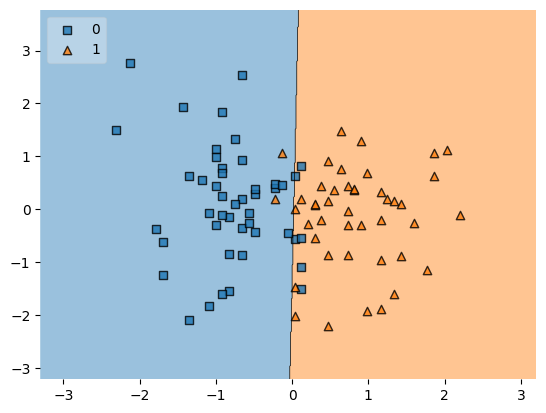

In [56]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [58]:
import pickle

In [59]:
pickle.dump(clf,open('model.pkl','wb'))